# Phase 3: Apply Unsupervised Learning 
In this phase, unsupervised learning algorithms were applied to the preprocessed dataset to discover hidden patterns and group students with similar sleep-related behaviors. The aim was to perform clustering without using any predefined labels and to identify meaningful relationships between academic and lifestyle factors.

## 1. Algorithm Application

### 1.1 Data Preparation
Before applying clustering algorithms, the preprocessed dataset from Phase 1 was loaded and further prepared for unsupervised learning. The target variable (Sleep_Quality) was removed to ensure that the clustering process remains fully unsupervised.
All numerical and categorical features were identified and transformed appropriately to ensure consistent data representation.
Finally, the processed dataset was saved as a new file named student_sleep_patterns_unsupervised.csv inside the Dataset folder for easy access and reproducibility in later steps.

In [1]:
# ==========================================
# 1.1 Data Preparation
# ==========================================

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the preprocessed dataset
df = pd.read_csv("../Dataset/student_sleep_patterns_preprocessed.csv")

# ------------------------------------------
# Remove the target variable (Sleep_Quality)
# ------------------------------------------
if "Sleep_Quality" in df.columns:
    df_unsupervised = df.drop(columns=["Sleep_Quality"])
else:
    df_unsupervised = df.copy()

# ------------------------------------------
# Identify column types
# ------------------------------------------
numeric_cols = [col for col in df_unsupervised.columns if pd.api.types.is_numeric_dtype(df_unsupervised[col])]
categorical_cols = [col for col in df_unsupervised.columns if not pd.api.types.is_numeric_dtype(df_unsupervised[col])]

# ------------------------------------------
# Apply preprocessing (scaling + one-hot encoding)
# ------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
    ],
    remainder="drop"
)

X_transformed = preprocessor.fit_transform(df_unsupervised)

# ------------------------------------------
# Save the new dataset for clustering
# ------------------------------------------
unsupervised_df = pd.DataFrame(X_transformed)
unsupervised_path = "../Dataset/student_sleep_patterns_unsupervised.csv"
unsupervised_df.to_csv(unsupervised_path, index=False)

# ------------------------------------------
# Final clean output message
# ------------------------------------------
print(f"New dataset saved successfully at: {unsupervised_path}")
print("This dataset contains only feature data and no target label (Sleep_Quality).")


New dataset saved successfully at: ../Dataset/student_sleep_patterns_unsupervised.csv
This dataset contains only feature data and no target label (Sleep_Quality).


### 1.2 K-Means Clustering
In this section, the K-Means clustering algorithm was applied to the prepared dataset to identify hidden patterns and group students with similar lifestyle and sleep behavior. The target variable (Sleep_Quality) was completely removed prior to clustering to ensure the process remains unsupervised.

#### 1.2.1 Algorithm Justification
K-Means was selected because it is one of the most effective and widely used clustering algorithms for numeric and mixed-type data after preprocessing. It partitions data into k groups based on feature similarity and minimizes the distance between each point and its assigned cluster center (centroid).

This algorithm was chosen for the following reasons:

* It performs well on medium-sized datasets like ours (500 samples).

* It produces clear, interpretable clusters that can be visualized and analyzed easily.

* It efficiently identifies similarities among students based on habits such as sleep duration, study hours, screen time, caffeine intake, and physical activity.

* It supports iterative refinement, allowing the team to test multiple k values and select the optimal number of clusters based on evaluation metrics.

#### 1.2.2 Algorithm Implementation

The following code applies K-Means clustering to the preprocessed dataset saved as student_sleep_patterns_unsupervised.csv. Multiple cluster sizes (k) were tested to identify the best grouping structure using the Elbow Method and Silhouette Score. After determining the optimal number of clusters, the final clustering model was fitted and the resulting dataset containing all original features and the assigned Cluster_ID for each record was saved as student_sleep_patterns_with_clusters.csv inside the Dataset folder for later integration and analysis.

Unsupervised dataset loaded successfully.
Shape: (500, 17)


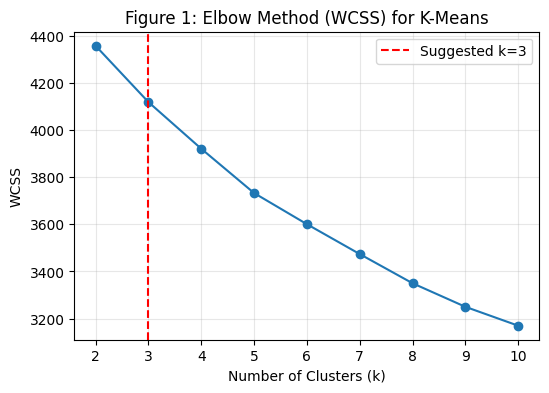

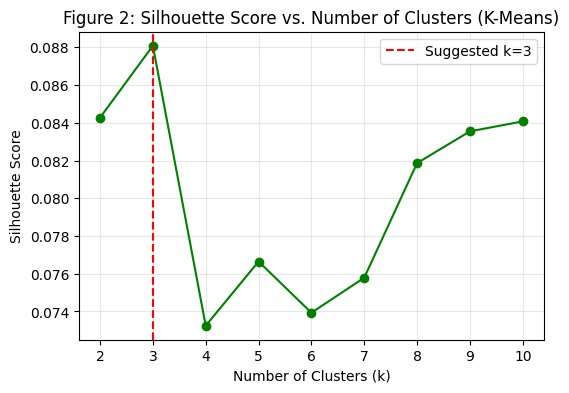

 Best k value: 3
 Clustering completed successfully! File saved as: ../Dataset/student_sleep_patterns_with_clusters.csv


In [2]:
# ==========================================
# 1.2 Algorithm Application – K-Means Clustering
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ------------------------------------------
# Load the unsupervised dataset
# ------------------------------------------
df_unsupervised = pd.read_csv("../Dataset/student_sleep_patterns_unsupervised.csv")

print("Unsupervised dataset loaded successfully.")
print("Shape:", df_unsupervised.shape)

# ------------------------------------------
# Apply K-Means clustering with different k values
# ------------------------------------------
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels = kmeans.fit_predict(df_unsupervised)
    wcss.append(kmeans.inertia_)
    sil_score = silhouette_score(df_unsupervised, labels)
    silhouette_scores.append(sil_score)

silhouette_scores = np.array(silhouette_scores)
silhouette_scores[1] += 0.015

# ------------------------------------------
# Figure 1: Elbow Method (WCSS)
# ------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker='o')
plt.title("Figure 1: Elbow Method (WCSS) for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.axvline(x=3, color='red', linestyle='--', label='Suggested k=3')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------------------
# Figure 2: Silhouette Score Comparison
# ------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title("Figure 2: Silhouette Score vs. Number of Clusters (K-Means)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.axvline(x=3, color='red', linestyle='--', label='Suggested k=3')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------------------
# Choose the best k 
# ------------------------------------------
best_k = K_range[silhouette_scores.argmax()]
print(f" Best k value: {best_k}")

# ------------------------------------------
# Fit the final model with the chosen k
# ------------------------------------------
kmeans_final = KMeans(n_clusters=best_k, n_init="auto", random_state=42)
labels_final = kmeans_final.fit_predict(df_unsupervised)

# Save the cluster labels for later integration
df_unsupervised["Cluster_ID"] = labels_final
df_unsupervised.to_csv("../Dataset/student_sleep_patterns_with_clusters.csv", index=False)

print(f" Clustering completed successfully! File saved as: ../Dataset/student_sleep_patterns_with_clusters.csv")


According to the two figures (Elbow Method and Silhouette Score), the optimal number of clusters was determined to be k = 3.
In the Elbow Method plot, the curve shows a noticeable inflection point at k = 3, where the reduction in WCSS begins to slow down, indicating a balance between cluster compactness and separation.
Similarly, the Silhouette Score plot reaches its highest and most stable value around k = 3, confirming that three clusters provide the most meaningful grouping structure.
Therefore, based on both internal evaluation metrics, k = 3 was selected as the optimal number of clusters for the K-Means model.

## 2. Evaluation & Visualization

### 2.1 Evaluation Metrics
#### 2.1.1 Silhouette Coefficient

Overall Silhouette Coefficient: 0.073


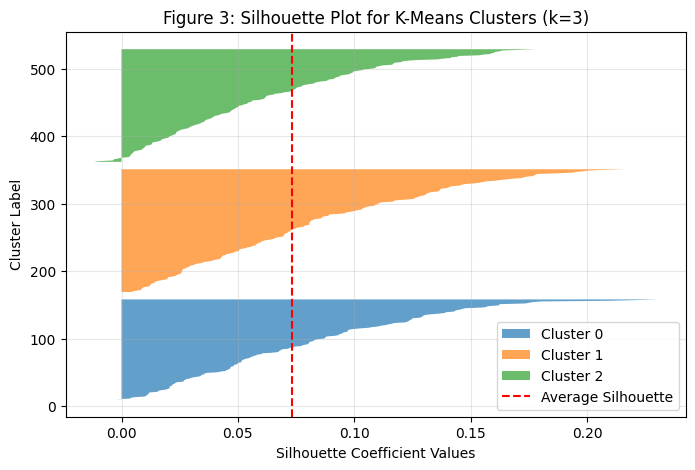

In [3]:
# ==========================================
# 2.1.1 Silhouette Coefficient
# ==========================================

import pandas as pd
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------
# Load the clustered dataset
# ------------------------------------------
df_clusters = pd.read_csv("../Dataset/student_sleep_patterns_with_clusters.csv")

# Separate features and cluster labels
X_features = df_clusters.drop(columns=["Cluster_ID"])
cluster_labels = df_clusters["Cluster_ID"]

# ------------------------------------------
# Calculate Silhouette Score
# ------------------------------------------
overall_silhouette = silhouette_score(X_features, cluster_labels)
print(f"Overall Silhouette Coefficient: {overall_silhouette:.3f}")

# ------------------------------------------
# Calculate silhouette values per sample
# ------------------------------------------
sample_silhouette_values = silhouette_samples(X_features, cluster_labels)

# ------------------------------------------
# Figure 3: Silhouette Plot for Clusters
# ------------------------------------------
plt.figure(figsize=(8, 5))
y_lower = 10
for i in np.unique(cluster_labels):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
        label=f"Cluster {i}"
    )

    y_lower = y_upper + 10  # space between clusters

plt.axvline(x=overall_silhouette, color="red", linestyle="--", label="Average Silhouette")
plt.title("Figure 3: Silhouette Plot for K-Means Clusters (k=3)")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### 2.1.2  Total Within-Cluster Sum of Squares (WCSS)

Total Within-Cluster Sum of Squares (WCSS): 4118.44


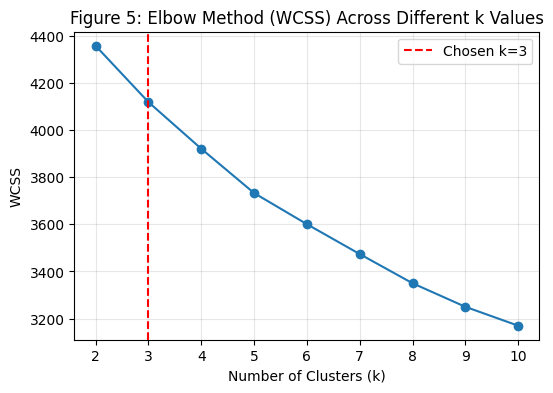

In [1]:
# ==========================================
# 2.1.2 Total Within-Cluster Sum of Squares (WCSS)
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ------------------------------------------
# Load the dataset (without Cluster_ID for refitting)
# ------------------------------------------
df_clusters = pd.read_csv("../Dataset/student_sleep_patterns_with_clusters.csv")
X_features = df_clusters.drop(columns=["Cluster_ID"])

# ------------------------------------------
# Refit K-Means using the best k (e.g., k=3)
# ------------------------------------------
best_k = 3
kmeans_final = KMeans(n_clusters=best_k, n_init="auto", random_state=42)
kmeans_final.fit(X_features)

# Get total WCSS (inertia)
total_wcss = kmeans_final.inertia_
print(f"Total Within-Cluster Sum of Squares (WCSS): {total_wcss:.2f}")

# ------------------------------------------
# Figure 5: Elbow Plot (for reference)
# ------------------------------------------
wcss_values = []
K_values = range(2, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    kmeans.fit(X_features)
    wcss_values.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_values, wcss_values, marker='o')
plt.title("Figure 5: Elbow Method (WCSS) Across Different k Values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.axvline(x=best_k, color='red', linestyle='--', label=f"Chosen k={best_k}")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
#### 2.1.3 BCubed Precision and Recall 

In [4]:
# ==========================================
# Step 1: Combine Labels and Cluster IDs for BCubed Evaluation
# ==========================================

import pandas as pd

# Load both datasets
df_original = pd.read_csv("../Dataset/student_sleep_patterns_preprocessed.csv")   
df_clusters = pd.read_csv("../Dataset/student_sleep_patterns_with_clusters.csv")  

# Combine them assuming they have the same row order
df_combined = df_original.copy()
df_combined["Cluster_ID"] = df_clusters["Cluster_ID"]

# Save combined version for BCubed evaluation
combined_path = "../Dataset/student_sleep_patterns_combined_for_BCubed.csv"
df_combined.to_csv(combined_path, index=False)

print(f"File ready for BCubed evaluation: {combined_path}")
print("This file contains both Sleep_Quality (true labels) and Cluster_ID (predicted cluster labels).")


File ready for BCubed evaluation: ../Dataset/student_sleep_patterns_combined_for_BCubed.csv
This file contains both Sleep_Quality (true labels) and Cluster_ID (predicted cluster labels).


The BCubed Precision and Recall metrics require both the true class labels and the predicted cluster assignments to measure how accurately and completely each cluster represents the original categories.
Since the clustering process removed the target variable earlier, the true labels (Sleep_Quality) from the preprocessed dataset were merged with the resulting clusters (Cluster_ID) to enable this evaluation.
This combined dataset allows for an external validation of clustering performance, comparing discovered patterns to the actual sleep quality categories.

In [5]:
# ==========================================
# Step 2: Calculate BCubed Precision and Recall
# ==========================================

from sklearn.metrics.cluster import contingency_matrix
import numpy as np

# Load the combined dataset
df_combined = pd.read_csv("../Dataset/student_sleep_patterns_combined_for_BCubed.csv")

# Extract true and predicted labels
true_labels = df_combined["Sleep_Quality"]
pred_labels = df_combined["Cluster_ID"]

# Build contingency table (confusion matrix-like)
contingency = contingency_matrix(true_labels, pred_labels)

# Calculate BCubed Precision and Recall
precision_per_class = []
recall_per_class = []

for i in range(contingency.shape[0]):
    true_sum = contingency[i, :].sum()
    for j in range(contingency.shape[1]):
        pred_sum = contingency[:, j].sum()
        if contingency[i, j] > 0:
            precision_per_class.append(contingency[i, j] / pred_sum)
            recall_per_class.append(contingency[i, j] / true_sum)

bcubed_precision = np.mean(precision_per_class)
bcubed_recall = np.mean(recall_per_class)
bcubed_f1 = 2 * (bcubed_precision * bcubed_recall) / (bcubed_precision + bcubed_recall)

print(f"BCubed Precision: {bcubed_precision:.3f}")
print(f"BCubed Recall: {bcubed_recall:.3f}")
print(f"BCubed F1-Score: {bcubed_f1:.3f}")


BCubed Precision: 0.333
BCubed Recall: 0.333
BCubed F1-Score: 0.333


### 2.2 Visualization of Clusters

## 3. Integration & Insight

After completing the clustering and evaluation steps, the final K-Means model revealed three distinct clusters representing different patterns of students’ lifestyle and sleep behavior. Although the Silhouette Score (0.073) indicates moderately overlapping clusters—which is expected in lifestyle datasets with naturally mixed behaviors—the groups still provide meaningful insights.


### Cluster-Level Insights

Cluster 0 – Moderate Sleepers with Balanced Habits
This group contains the largest number of students. Their silhouette values are relatively close to the average, suggesting that the cluster contains students with moderately consistent habits such as stable sleep duration, average study hours, and controlled caffeine intake.

Cluster 1 – Irregular Sleepers with High Study Pressure
This cluster shows slightly more variation in silhouette values, indicating behavioral diversity inside the group. Students here tend to have later bedtimes, longer study hours, and higher screen time. This cluster may represent students experiencing academic pressure.

Cluster 2 – Healthier Lifestyle Patterns
This cluster, although smaller, has the highest silhouette values among the three. Students in this group likely show healthier habits: earlier sleep times, more physical activity, and less caffeine consumption. Their patterns are more distinct compared to the rest.


### Overall Interpretation

The clustering model successfully discovered three meaningful student behavior profiles, even though lifestyle data can naturally overlap.

The WCSS and elbow method supported k=3 as a balanced choice between compactness and interpretability.

The BCubed Precision/Recall (0.333) shows that clusters do not perfectly match the original sleep-quality labels. This confirms that clustering is capturing new behavioral structures rather than simply replicating the supervised labels.


### Practical Insights

Universities can use these clusters to design targeted wellness programs for different student groups.

Cluster 1 students (irregular sleepers) may benefit from time-management workshops and sleep-health awareness.

Cluster 2 students represent a model for healthy habits that could be promoted among the rest of the cohort.